In [85]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
match=pd.read_csv(r"C:\Users\jeevi\Downloads\Indian Premier League\matches.csv")
score=pd.read_csv(r"C:\Users\jeevi\Downloads\Indian Premier League\deliveries.csv")

In [5]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
score.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## Basic Information about the dataset

In [8]:
print(match.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [9]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [11]:
match.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [12]:
score.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [13]:
match.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [14]:
score.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [17]:
#Matches we have got in the dataset
match.shape

(756, 18)

In [18]:
# seasons we have got in the dataset
match['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

### Team won by Maximum Runs

In [20]:
match.iloc[match['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [22]:
match.iloc[match['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

### Team won by minimum runs

In [23]:
match.iloc[match[match['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

### Team won by minimum wickets

In [24]:
match.iloc[match[match['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner']

'Kolkata Knight Riders'

### Season which had most number of matches

<Axes: xlabel='season', ylabel='count'>

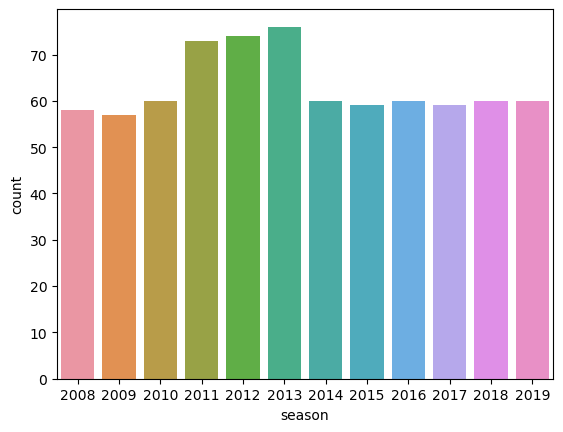

In [32]:
sns.countplot(x='season',data=match)

#### we can see the year 2013 has the highest matches

<Axes: xlabel='winner'>

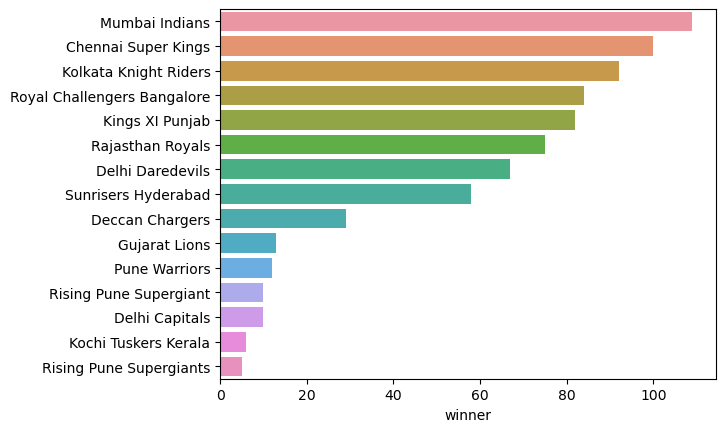

In [35]:
data=match.winner.value_counts()
sns.barplot(x=data,y=data.index)

#### we can see that Mumbai Indians won the higher matches


Text(0.5, 1.0, 'Top player of the match Winners')

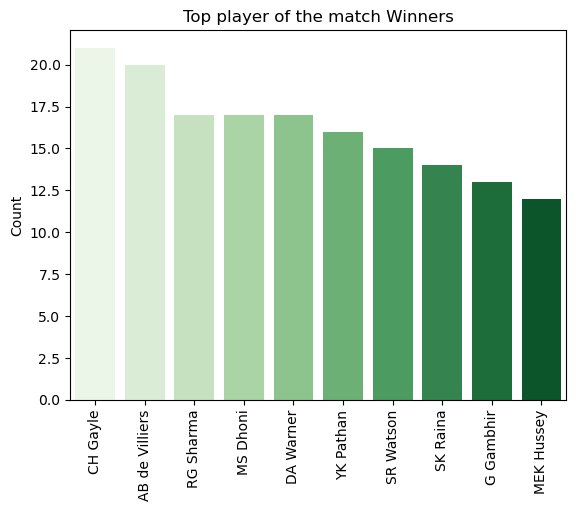

In [48]:
top_players = match.player_of_match.value_counts()[:10]
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, palette="Greens");
plt.ylabel("Count")
plt.title("Top player of the match Winners")

CH Gayle is the most Successful player in all match winners

### Champions each season

In [50]:
df = match.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
df

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


### Number of matches in each venue

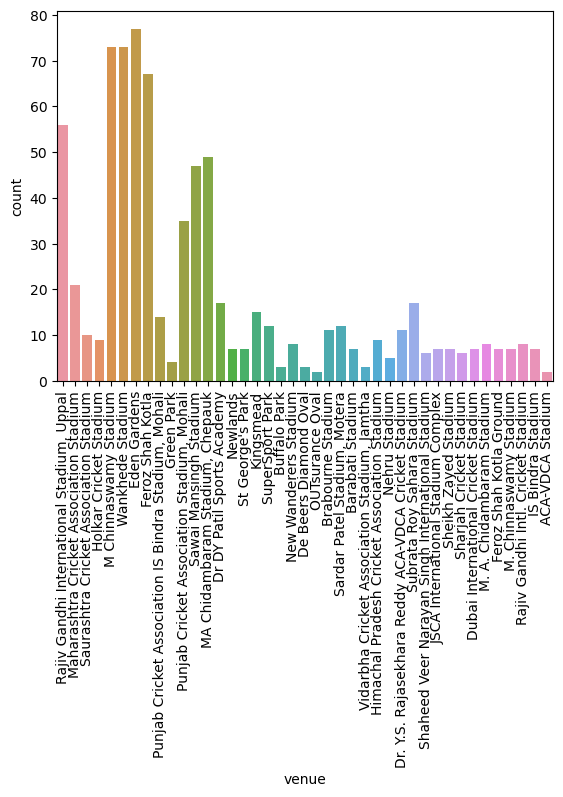

In [55]:
sns.countplot(x='venue', data=match)
plt.xticks(rotation='vertical')
plt.show()

#### There are quite a few venues present in the data with "Eden Gardens" being the one with most number of matches.

### Number of matches played by each team

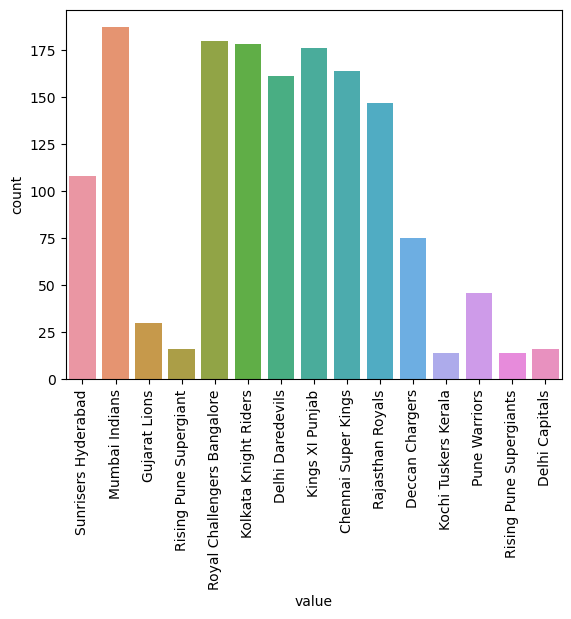

In [56]:
df = pd.melt(match, id_vars=['id','season'], value_vars=['team1', 'team2'])
sns.countplot(x='value', data=df)
plt.xticks(rotation='vertical')
plt.show()

### Toss decision

Text(0.5, 1.0, 'Toss decision percentage')

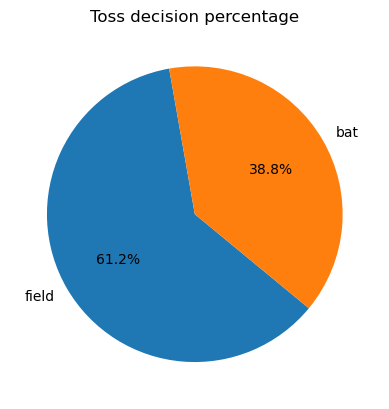

In [68]:
temp_series = match.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels,autopct='%1.1f%%', startangle=100)
plt.title("Toss decision percentage")

#### Almost 61% of the toss decisions are made to field first. Now let us see how this decision varied over time.

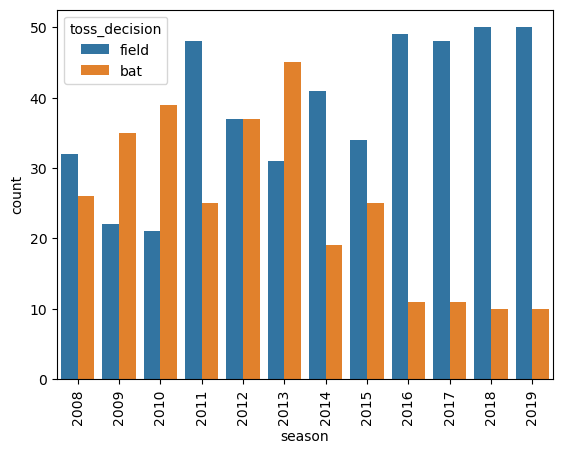

In [61]:
sns.countplot(x='season', hue='toss_decision', data=match)
plt.xticks(rotation='vertical')
plt.show()

#### It seems during the initial years, teams wanted to bat first. Look at the 2011 season, most of the toss decisions are to field first.

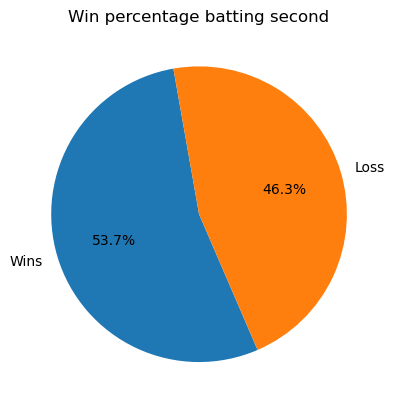

In [67]:
wins = (match.win_by_wickets>0).sum()
loss = (match.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(wins + loss)
sizes = [(wins/total)*100, (loss/total)*100]
plt.pie(sizes, labels=labels,autopct='%1.1f%%',  startangle=100)
plt.title("Win percentage batting second")
plt.show()

#### So percentage of times teams batting second has won is 53.7. Now let us split this by year and see the distribution.

### Batsman analysis

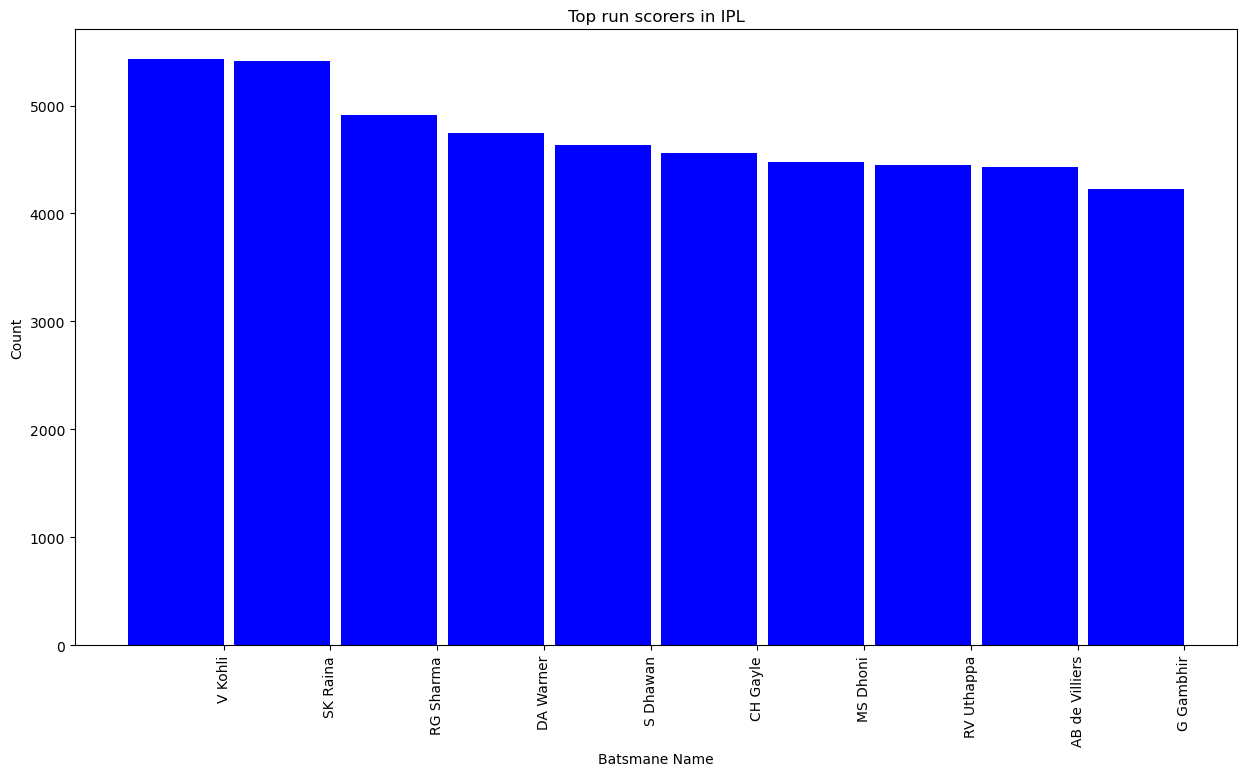

In [71]:
df = score.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
df = df.iloc[:10,:]

labels = np.array(df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(df['batsman_runs']), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
ax.set_xlabel('Batsmane Name')
plt.show()

In [75]:
pip install pivottablejs

  Using cached pivottablejs-0.9.0-py2.py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [76]:
from pivottablejs import pivot_ui

In [78]:
pivot_ui(score)

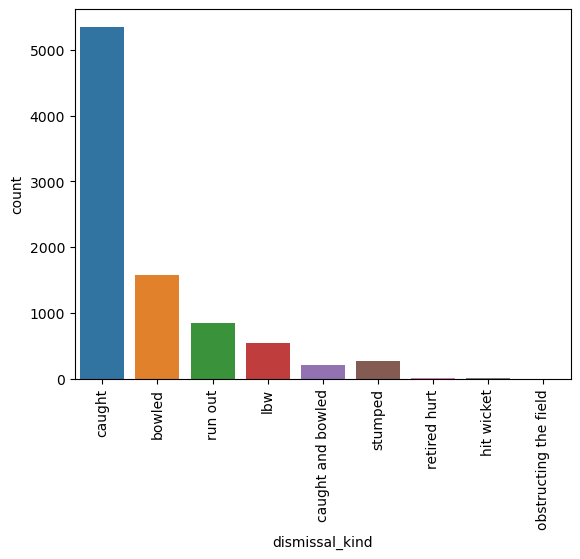

In [80]:
# Now let us see most common dismissal types in IPL.
sns.countplot(x='dismissal_kind', data=score)
plt.xticks(rotation='vertical')
plt.show()

In [86]:
teams_per_season = match.groupby('season')['winner'].value_counts()
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1   
        
win_per_season_df

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12
